# Visualizations with Merged Dataset

# Necessary Importations

In [1]:
#Necessary Importations
import pandas as pd
import numpy as np
import requests
import io
import os
import seaborn as sns
import matplotlib.pyplot as plt 
import statsmodels.api as sm

# Defined Functions

In [32]:
#Line Plots
def lineplot(df,x_column,y_column,color_var,title,x_title,y_title):
    ax = sns.lineplot(
        data = df,      # Dataframe with long format data
        x = x_column,                   # Column for x-axis (dates)
        y = y_column,         # Column for y-axis (GDP values)
        hue = color_var               # Column for color differentiation (countries)
    )
    ax.set_title(title)
    ax.set_xlabel(x_title)
    ax.set_ylabel(y_title)
    plt.show()

#Grouped Summary Bar Plots 
def group_plot(df,group,column,title):
    plot = df.groupby(group)[column].describe().transpose().drop('count')
    ax = plot.plot(kind = 'barh')
    ax.set_title(title)
    ax.set_xlabel('Value')
    ax.set_ylabel('Statistic')
    plt.show()

def scatter_plot(df, x_col, y_col,title,key):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=x_col, y=y_col, hue=key, data=df)

    try:
        for region in df[key].unique():
            region_df = df[df[key] == region]
            z = np.polyfit(region_df[x_col], region_df[y_col], 1)
            p = np.poly1d(z)
            xp = np.linspace(region_df[x_col].min(), region_df[x_col].max(), 100)
            plt.plot(xp, p(xp), label=f'{region} Line of Best Fit')
    except np.linalg.LinAlgError:
        print("Error: unable to calculate line of best fit")

    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(title)
    plt.legend()
    plt.show()

In [2]:
df = pd.read_csv("../data/processed/second_merged.csv")
df = df.set_index(['code','year'])

df.head()

Food supply quantity (kg/capita/yr)_Cereals - Excluding Beer  \
code year                                                                 
BGD  2011                                             278.27              
     2012                                             278.22              
     2013                                             273.69              
     2014                                             272.78              
     2015                                             278.61              

           Food supply quantity (kg/capita/yr)_Starchy Roots  rolling_std  \
code year                                                                   
BGD  2011                                              47.40    46.219922   
     2012                                              48.06    45.756559   
     2013                                              48.70    36.231714   
     2014                                              49.29     2.619036   
     2015                                              50.07     2.833060   

           Rural Access to Electricity(Percent of Population)  \
code year                                                       
BGD  2011                                               45.7    
     2012                                               53.8    
     2013                                               48.6    
     2014                                               48.1    
     2015                                               63.8    

           Mobile Cellular Subscriptions (per 100 people)  \
code year                                                   
BGD  2011                                       56.166790   
     2012                                       63.896104   
     2013                                       75.669007   
     2014                                       81.344598   
     2015                                       83.238753   

           Fixed Broadband Subsciptions (per 100 people) region  \
code year                                                         
BGD  2011                                       0.305031     SA   
     2012                                       0.387219     SA   
     2013                                       0.974448     SA   
     2014                                       1.958140     SA   
     2015                                       3.069920     SA   

           Agriculture, forestry, and fishing, value added (percent of GDP)  \
code year                                                                     
BGD  2011                                          16.809987                  
     2012                                          16.177563                  
     2013                                          15.493278                  
     2014                                          15.351621                  
     2015                                          14.782996                  

           Crop production index (2014-2016 = 100)  Account (% age 15+)  ...  \
code year                                                                ...   
BGD  2011                                    93.78            31.740000  ...   
     2012                                    94.27            31.490000  ...   
     2013                                    96.58            31.240000  ...   
     2014                                    98.76            30.990000  ...   
     2015                                   100.69            37.343333  ...   

           Fertility rate, total (births per woman)  \
code year                                             
BGD  2011                                     2.309   
     2012                                     2.263   
     2013                                     2.247   
     2014                                     2.228   
     2015                                     2.227   

           GDP per capita, PPP (constant 2021 international $)  \
code year               

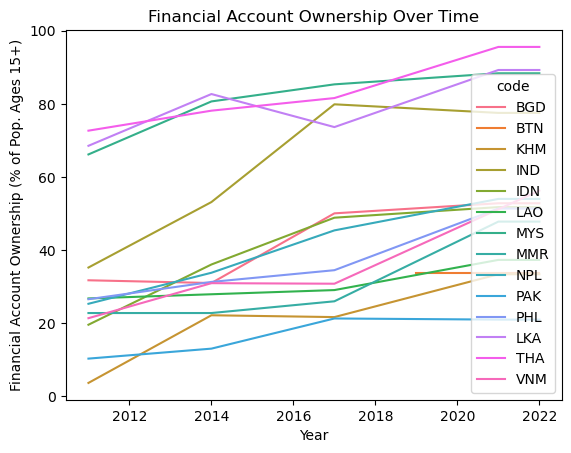

In [21]:
lineplot(
    df,
    'year',
    'Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+)',
    'code',
    "Financial Account Ownership Over Time",
    "Year",
    "Financial Account Ownership (% of Pop. Ages 15+)")

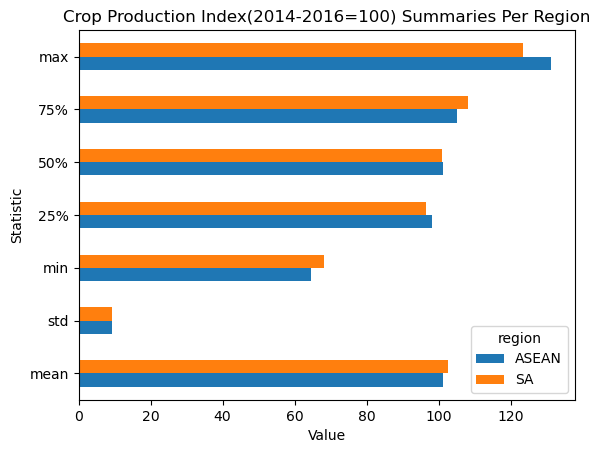

In [28]:
group_plot(df,'region','Crop production index (2014-2016 = 100)','Crop Production Index(2014-2016=100) Summaries Per Region')

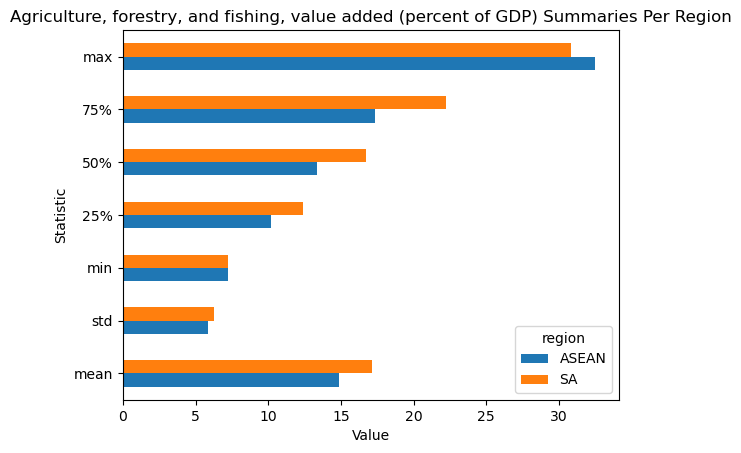

In [29]:
group_plot(df,'region','Agriculture, forestry, and fishing, value added (percent of GDP)','Agriculture, forestry, and fishing, value added (percent of GDP) Summaries Per Region')

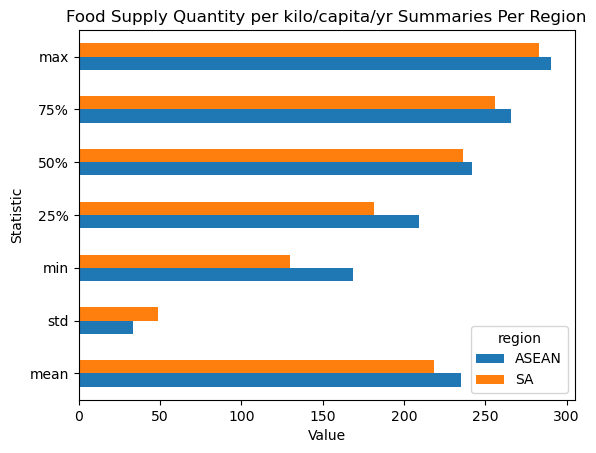

In [30]:
group_plot(df,'region','Food supply quantity (kg/capita/yr)_Cereals - Excluding Beer','Food Supply Quantity per kilo/capita/yr Summaries Per Region')

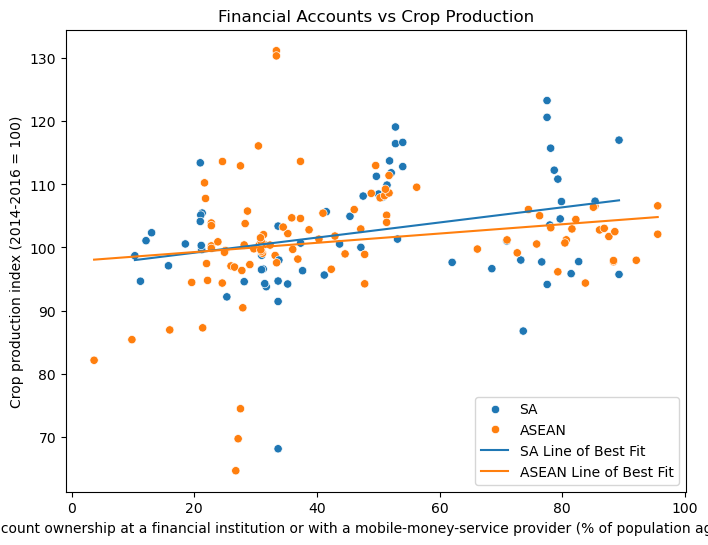

In [33]:
scatter_plot(df,'Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+)','Crop production index (2014-2016 = 100)','Financial Accounts vs Crop Production','region')

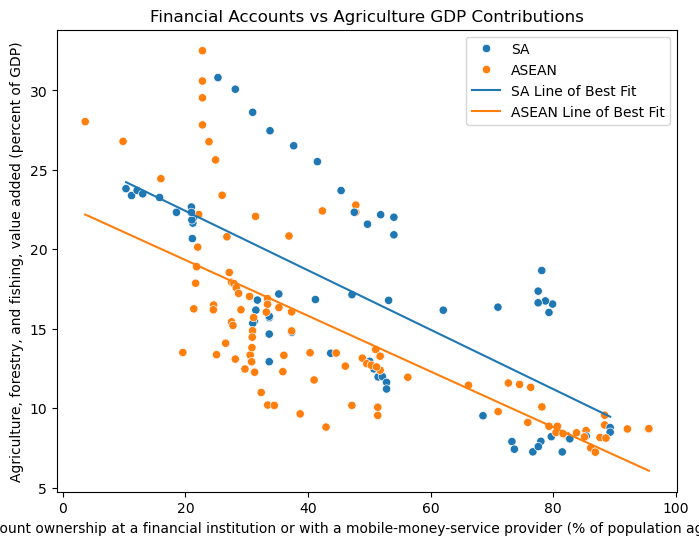

In [34]:
scatter_plot(df,'Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+)','Agriculture, forestry, and fishing, value added (percent of GDP)','Financial Accounts vs Agriculture GDP Contributions','region')

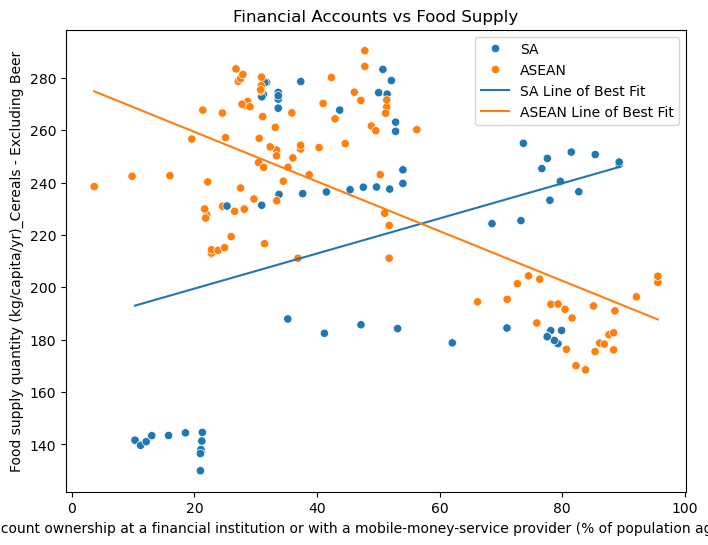

In [35]:
scatter_plot(df,'Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+)','Food supply quantity (kg/capita/yr)_Cereals - Excluding Beer','Financial Accounts vs Food Supply','region')

## Regression

In [3]:
# regress financial account on crop production index
X = df['Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+)']
y = df['Crop production index (2014-2016 = 100)']
X = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(y, X).fit()  # Fit the model
print(model.summary())

                                       OLS Regression Results                                      
Dep. Variable:     Crop production index (2014-2016 = 100)   R-squared:                       0.057
Model:                                                 OLS   Adj. R-squared:                  0.051
Method:                                      Least Squares   F-statistic:                     9.501
Date:                                     Mon, 26 May 2025   Prob (F-statistic):            0.00242
Time:                                             22:14:49   Log-Likelihood:                -577.11
No. Observations:                                      160   AIC:                             1158.
Df Residuals:                                          158   BIC:                             1164.
Df Model:                                                1                                         
Covariance Type:                                 nonrobust                                         


From the baseline OLS model, we find that account ownership is positively and significantly associated with the crop production index. Specifically, a 1 percentage point increase in the share of adults (15+) with an account at a financial institution or mobile money service provider is associated with a 0.093 point increase in the crop production index.

The relationship is statistically significant at the 1% level (p = 0.002). The intercept suggests that if account ownership were 0%, the expected crop production index would be approximately 97.38.

In [5]:
# regress financial account on crop production index with controls
import statsmodels.api as sm

# Select variables
x = df[['Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+)',
        'Fertility rate, total (births per woman)', 
        'GDP per capita, PPP (constant 2021 international $)', 
        'Life expectancy at birth, total (years)', 
        'Mortality rate, infant (per 1,000 live births)', 
        'Population density (people per sq. km of land area)', 
        'Population growth (annual %)', 
        'Population, total',
        'Poverty headcount ratio at national poverty lines (% of population)',
        'Rural population (% of total population)',
        'Urban population (% of total population)']]

y = df['Crop production index (2014-2016 = 100)']

# Combine x and y and drop rows with any NaN
data = pd.concat([x, y], axis=1).dropna()

# Split back after cleaning
x_clean = data.drop(columns='Crop production index (2014-2016 = 100)')
y_clean = data['Crop production index (2014-2016 = 100)']

# Add constant
x_clean = sm.add_constant(x_clean)

# Run regression
model = sm.OLS(y_clean, x_clean).fit()

# Summary
print(model.summary())

                                       OLS Regression Results                                      
Dep. Variable:     Crop production index (2014-2016 = 100)   R-squared:                       0.559
Model:                                                 OLS   Adj. R-squared:                  0.449
Method:                                      Least Squares   F-statistic:                     5.074
Date:                                     Mon, 26 May 2025   Prob (F-statistic):           9.31e-05
Time:                                             22:24:07   Log-Likelihood:                -156.98
No. Observations:                                       51   AIC:                             336.0
Df Residuals:                                           40   BIC:                             357.2
Df Model:                                               10                                         
Covariance Type:                                 nonrobust                                         


Demographic variables are added into the OLS model as controls. They include vital staistics, populaion estimats, and poverty level in each country, as they vary largely from one context to another. After adding the controls, the statistical significance increases to 1% (p=0) compared with the baseline model. The coefficient also suggests that account ownership is positively and significantly associated with the crop production index. Specifically, a 1 percentage point increase in the share of adults (15+) with an account at a financial institution or mobile money service provider is associated with a 0.57 point increase in the crop production index. The magnitude of the coefficient increases substantially, suggesting that once account for SES background and other characteristics that are unique in each country, the true partial effect of account ownership is even stronger than previosuly estiamted. 


In [13]:
# add time fixed effects
# Ensure all variables are numeric
x_clean = x_clean.apply(pd.to_numeric, errors='coerce')
y_clean = pd.to_numeric(y_clean, errors='coerce')

# Drop any rows with NaNs after conversion
df_model = pd.concat([x_clean, y_clean], axis=1).dropna()
X_final = df_model[x_clean.columns]
Y_final = df_model[y_clean.name]

# Fit model
model = sm.OLS(Y_final, X_final).fit()
print(model.summary())









ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [14]:
print(x_clean.dtypes[x_clean.dtypes == 'object'])


Series([], dtype: object)
